In [2]:
#1 pakages
import pandas as pd 
import os

In [3]:
df=pd.read_excel('Data_Train.xlsx')

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'Data_Train.xlsx',
 'flight_prediction_shan_singh.ipynb',
 'Test_set.xlsx',
 'zakaria.ipynb']

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
#2 handle missing values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df[df.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
df.dropna(inplace=True)


In [10]:
df=df.reset_index(drop=True,)

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
df.iloc[9030:9040]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9030,Multiple carriers,9/03/2019,Delhi,Cochin,DEL → BOM → COK,18:15,01:35 10 Mar,7h 20m,1 stop,In-flight meal not included,14086
9031,IndiGo,3/05/2019,Chennai,Kolkata,MAA → CCU,19:35,21:55,2h 20m,non-stop,No info,3597
9032,Jet Airways,24/05/2019,Kolkata,Banglore,CCU → BOM → BLR,18:55,08:15 25 May,13h 20m,1 stop,No info,13731
9033,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:45,04:25 22 May,8h 40m,1 stop,In-flight meal not included,12898
9034,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,16:00,04:25 07 Jun,12h 25m,1 stop,No info,14714
9035,Vistara,12/04/2019,Banglore,Delhi,BLR → DEL,11:30,14:20,2h 50m,non-stop,No info,5403
9036,Jet Airways,24/06/2019,Banglore,Delhi,BLR → DEL,06:00,08:45,2h 45m,non-stop,In-flight meal not included,5769
9037,Air Asia,24/03/2019,Kolkata,Banglore,CCU → BLR,10:20,12:55,2h 35m,non-stop,No info,5620
9038,IndiGo,18/06/2019,Delhi,Cochin,DEL → COK,05:35,08:50,3h 15m,non-stop,No info,5000
9039,Air India,21/03/2019,Delhi,Cochin,DEL → LKO → BOM → COK,12:20,19:15 22 Mar,30h 55m,2 stops,No info,10703


In [13]:
# 3 datetype
def change_datetime(col):
    for c in col:
        data[c]=pd.to_datetime(data[c])

In [14]:
data=df.copy()

In [15]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
data_features=['Date_of_Journey','Dep_Time','Arrival_Time']

In [17]:
change_datetime(data_features)

C:\Users\ZAKARIA BOULLAM\AppData\Local\Temp\ipykernel_10736\246002642.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[c]=pd.to_datetime(data[c])
C:\Users\ZAKARIA BOULLAM\AppData\Local\Temp\ipykernel_10736\246002642.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[c]=pd.to_datetime(data[c])
C:\Users\ZAKARIA BOULLAM\AppData\Local\Temp\ipykernel_10736\246002642.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[c]=pd.to_datetime(data[c])


In [18]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [19]:
from warnings import filterwarnings
filterwarnings('ignore')

In [20]:
# 4 features creations derived features

In [21]:
data['Month_of_Journey']=data['Date_of_Journey'].dt.month

In [22]:
data['Year_of_Journey']=data['Date_of_Journey'].dt.year

In [23]:
data['Day_of_Journey']=data['Date_of_Journey'].dt.day

In [24]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Year_of_Journey,Day_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-12-31 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,2019,24


In [25]:
# arrival time and dep time 
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    data[col+'_min']=data[col].dt.minute
    

In [26]:
extract_hour(data,'Dep_Time')

In [27]:
extract_hour(data,'Arrival_Time')

In [28]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Year_of_Journey,Day_of_Journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-12-31 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,2019,24,22,20,1,10


In [29]:
data.drop(columns=['Dep_Time','Arrival_Time'],inplace=True)

In [30]:
data.dtypes

Airline                      object
Date_of_Journey      datetime64[ns]
Source                       object
Destination                  object
Route                        object
Duration                     object
Total_Stops                  object
Additional_Info              object
Price                         int64
Month_of_Journey              int32
Year_of_Journey               int32
Day_of_Journey                int32
Dep_Time_hour                 int32
Dep_Time_min                  int32
Arrival_Time_hour             int32
Arrival_Time_min              int32
dtype: object

In [31]:
#let s see when flights usually take off
def preprocess_dep_time_hour(x):
    if x>=4 and x<=8:
        return 'Early Morning'
    elif x>=8 and x<=12:
        return 'Morning'
    elif x>=12 and x<=16:
        return 'Noon'
    elif x>=16 and x<=20:
        return 'Evening'
    elif x>20 and x<=24:
        return 'Night'
    else:
        return 'Late'

<Axes: xlabel='Dep_Time_hour'>

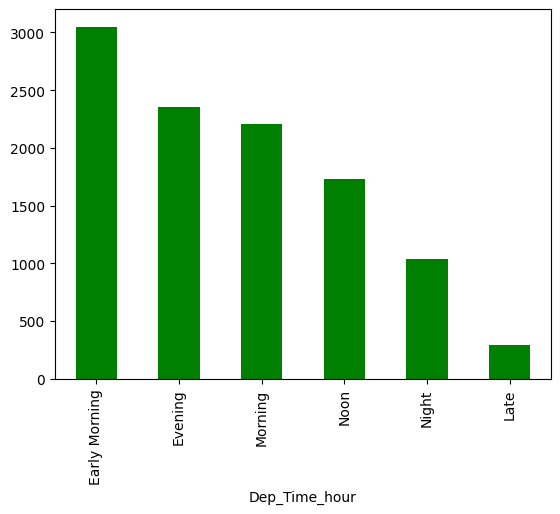

In [32]:
data['Dep_Time_hour'].apply(preprocess_dep_time_hour).value_counts().plot(kind='bar',color='green')

In [33]:
data['Dep_Time_hour'].iloc[0]=22

In [34]:
data['Dep_Time_hour']=data['Dep_Time_hour'].astype(int)

In [35]:
data.dtypes

Airline                      object
Date_of_Journey      datetime64[ns]
Source                       object
Destination                  object
Route                        object
Duration                     object
Total_Stops                  object
Additional_Info              object
Price                         int64
Month_of_Journey              int32
Year_of_Journey               int32
Day_of_Journey                int32
Dep_Time_hour                 int64
Dep_Time_min                  int32
Arrival_Time_hour             int32
Arrival_Time_min              int32
dtype: object

In [36]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Year_of_Journey,Day_of_Journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,2019,24,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,2019,1,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,2019,9,9,25,4,25


In [37]:
# handle duration
data['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10677    2h 30m
10678    2h 35m
10679        3h
10680    2h 40m
10681    8h 20m
Name: Duration, Length: 10682, dtype: object

In [38]:
def handle_duration_columns(x):
    if 'h' not in x:
        return '0h'+ ' ' +x
    if 'm' not in x:
        return x+' '+ '0m'
    return x

In [39]:
if 'd' in 'wfweda':
    print('ds')

ds


In [40]:
data['Duration']=data['Duration'].apply(handle_duration_columns)

In [41]:
data['Duration_mins']=data['Duration'].apply(lambda x: int(x.split(' ')[0][:-1]))
data['Duration_hours']=data['Duration'].apply(lambda x: int(x.split(' ')[1][:-1]))

In [42]:
int(data['Duration'].iloc[0].split(' ')[1][:-1])

50

In [43]:
data['Duration'].apply(lambda x: int(x.split(' ')[0][:-1]))

0         2
1         7
2        19
3         5
4         4
         ..
10677     2
10678     2
10679     3
10680     2
10681     8
Name: Duration, Length: 10682, dtype: int64

In [44]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Year_of_Journey,Day_of_Journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_mins,Duration_hours
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,2019,24,22,20,1,10,2,50


In [45]:
data['total_duration_minutes']=data['Duration'].apply(lambda x : eval(x.replace('h','*60').replace(' ','+').replace('m','')) )

In [46]:
# pd.col.str.replace regulaar expre
# pd.col.replace(x row with y row) so change a columns values 3 methods apply map replace

In [47]:
eval(data['Duration'][0].replace('h','*60').replace(' ','+').replace('m',''))

170

In [48]:
import seaborn as sns

<Axes: xlabel='total_duration_minutes', ylabel='Price'>

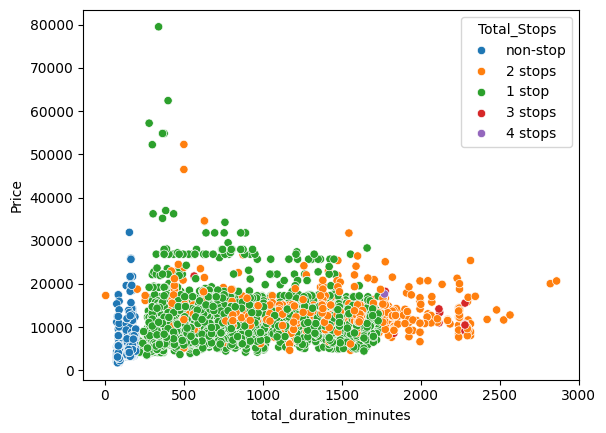

In [49]:
sns.scatterplot(data=data,x='total_duration_minutes',y='Price',hue='Total_Stops')

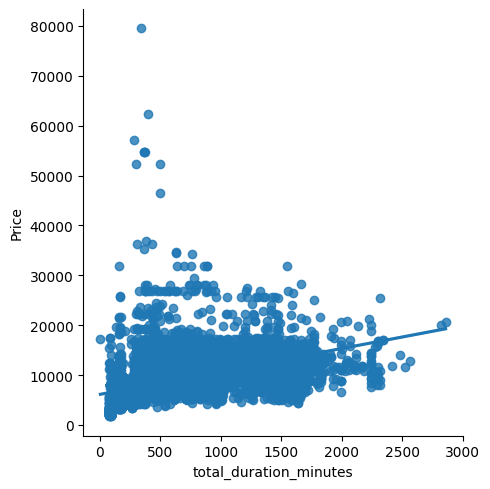

In [50]:
sns.lmplot(data=data,x='total_duration_minutes',y='Price')

In [51]:
# let now master groupby find out which root jet airways is extremely used
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Year_of_Journey,Day_of_Journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_mins,Duration_hours,total_duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,2019,24,22,20,1,10,2,50,170


In [52]:
data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [53]:
data[data['Airline']=='Jet Airways'].groupby('Route',as_index=False).size().sort_values(ascending=False,by='size') 

,Route,size
13,CCU → BOM → BLR,930
21,DEL → BOM → COK,875
1,BLR → BOM → DEL,385
3,BLR → DEL,382
15,CCU → DEL → BLR,300
27,DEL → JAI → BOM → COK,207
8,BOM → HYD,207
17,DEL → AMD → BOM → COK,141
25,DEL → IDR → BOM → COK,86
31,DEL → NAG → BOM → COK,61


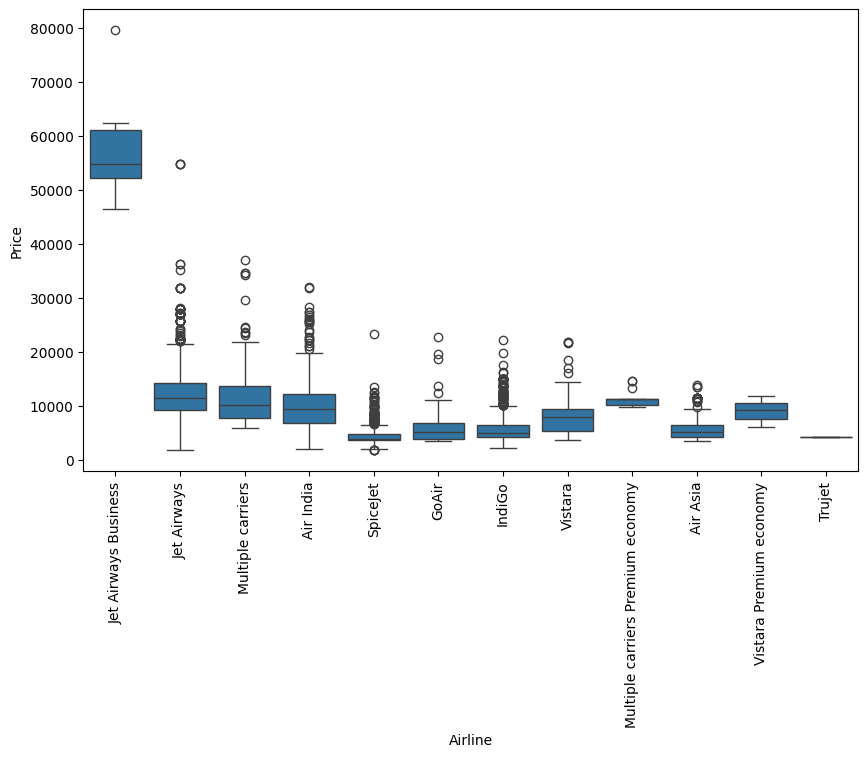

In [54]:
# box plot per each airline categoric vs price
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.boxplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation=90)
plt.show()


In [55]:
data.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price',
       'Month_of_Journey', 'Year_of_Journey', 'Day_of_Journey',
       'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour',
       'Arrival_Time_min', 'Duration_mins', 'Duration_hours',
       'total_duration_minutes'],
      dtype='object')

In [56]:
# one hot encoding 
cat_features=[col for col in data.columns if data[col].dtype == 'O']

In [57]:
cat_features

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [58]:
num_features=[col for col in data.columns if data[col].dtype != 'O']

In [59]:
num_features

['Date_of_Journey',
 'Price',
 'Month_of_Journey',
 'Year_of_Journey',
 'Day_of_Journey',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'Duration_mins',
 'Duration_hours',
 'total_duration_minutes']

In [60]:
data.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [61]:
for col in data.Source.unique():
    data['Source_'+col]=data['Source'].apply(lambda x: 1 if x==col else 0)

In [62]:
# Filtering  Keep only even numbers  [expression for item in iterable if condition]
numbers = [1, 2, 3, 4, 5, 6]
evens = [x for x in numbers if x % 2 == 0]
# Result: [2, 4, 6]
#The Rule:
# If you have an else: The entire condition must come before the for loop.
# If you only have an if (filtering): The condition must come after the for loop
evens

[2, 4, 6]

In [63]:
# Correct Syntax   [val_if_true if condition else val_if_false for item in iterable]
labels = ["Even" if x % 2 == 0 else "Odd" for x in numbers]
labels

['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even']

In [64]:
## target guided ordinal encoding 
data.Airline.nunique()

12

In [65]:
data.groupby('Airline').mean(numeric_only=True)

,Price,Month_of_Journey,Year_of_Journey,Day_of_Journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_mins,Duration_hours,total_duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
Airline,,,,,,,,,,,,,,,,
Air Asia,5590.260188,4.746082,2019.0,13.940439,13.996865,41.332288,11.981191,32.053292,5.194357,36.614420,348.275862,0.278997,0.470219,0.250784,0.000000,0.000000
Air India,9612.427756,4.587664,2019.0,12.886922,12.323815,22.472873,14.725871,26.973158,15.265563,27.047401,942.981154,0.189606,0.292404,0.426042,0.014278,0.077670
GoAir,5861.056701,4.670103,2019.0,13.314433,11.798969,35.000000,14.283505,36.443299,4.371134,36.701031,298.969072,0.479381,0.128866,0.391753,0.000000,0.000000
IndiGo,5673.682903,4.592791,2019.0,13.635655,12.215295,23.843156,12.343887,25.879201,4.215295,32.489040,285.406722,0.254749,0.216756,0.343400,0.089625,0.095470
Jet Airways,11643.923357,4.801247,2019.0,13.313588,13.363731,25.020785,13.098987,23.421668,13.721746,26.428943,849.733697,0.204729,0.326319,0.412055,0.000000,0.056898
Jet Airways Business,58358.666667,3.000000,2019.0,2.166667,10.666667,31.666667,9.166667,28.333333,6.000000,26.666667,386.666667,0.666667,0.000000,0.333333,0.000000,0.000000
Multiple carriers,10902.678094,4.884615,2019.0,14.515886,10.062709,18.628763,14.661371,16.906355,10.051839,22.658863,625.769231,0.000000,0.000000,1.000000,0.000000,0.000000
Multiple carriers Premium economy,11418.846154,3.000000,2019.0,21.000000,7.769231,21.923077,16.000000,23.846154,9.692308,25.000000,606.538462,0.000000,0.000000,1.000000,0.000000,0.000000
SpiceJet,4338.284841,4.660147,2019.0,14.161369,12.282396,30.446210,11.204156,25.409535,2.462103,30.757946,178.484108,0.221271,0.366748,0.106357,0.156479,0.149144


In [66]:
airlines=data.groupby('Airline')['Price'].mean().sort_values().index

In [67]:
labels_airline={key:index for index,key in enumerate(airlines)}

In [68]:
labels_airline

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [69]:
data.Airline=data.Airline.map(labels_airline)

In [70]:
data.Airline.unique()

array([ 3,  7, 10,  1,  8,  4,  5,  2,  6, 11,  9,  0])

In [71]:
data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [72]:
data.Destination=data.Destination.replace('New Delhi','Delhi')

In [73]:
data.Destination.unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [74]:
l=data.groupby('Destination')['Price'].mean().sort_values().index

In [75]:
labels_destination={key:index for index,key in enumerate(l)}

In [76]:
labels_destination

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [77]:
data.Destination=data.Destination.map(labels_destination)

In [78]:
data.Destination.unique()

array([2, 3, 4, 0, 1])

In [79]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,...,Arrival_Time_hour,Arrival_Time_min,Duration_mins,Duration_hours,total_duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,3,...,1,10,2,50,170,1,0,0,0,0


In [81]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [82]:
label_stop={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [83]:
data.Total_Stops=data.Total_Stops.map(label_stop)

In [85]:
data.Total_Stops.unique()

array([0, 2, 1, 3, 4])

In [86]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price',
       'Month_of_Journey', 'Year_of_Journey', 'Day_of_Journey',
       'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour',
       'Arrival_Time_min', 'Duration_mins', 'Duration_hours',
       'total_duration_minutes', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [89]:
data.drop(columns=['Date_of_Journey','Additional_Info','Route','Duration','total_duration_minutes','Source','Year_of_Journey'],inplace=True)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Airline            10682 non-null  int64
 1   Destination        10682 non-null  int64
 2   Total_Stops        10682 non-null  int64
 3   Price              10682 non-null  int64
 4   Month_of_Journey   10682 non-null  int32
 5   Day_of_Journey     10682 non-null  int32
 6   Dep_Time_hour      10682 non-null  int64
 7   Dep_Time_min       10682 non-null  int32
 8   Arrival_Time_hour  10682 non-null  int32
 9   Arrival_Time_min   10682 non-null  int32
 10  Duration_mins      10682 non-null  int64
 11  Duration_hours     10682 non-null  int64
 12  Source_Banglore    10682 non-null  int64
 13  Source_Kolkata     10682 non-null  int64
 14  Source_Delhi       10682 non-null  int64
 15  Source_Chennai     10682 non-null  int64
 16  Source_Mumbai      10682 non-null  int64
dtypes: int32(5),

In [106]:
# outliers
def plots(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(x=df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)
    

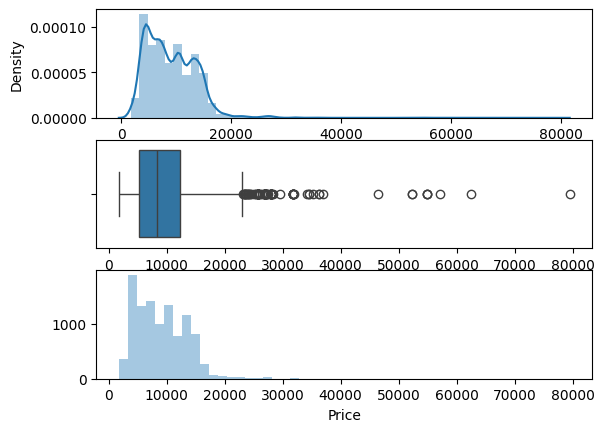

In [107]:
plots(data,'Price')

In [101]:
data.Price.dtype

dtype('int64')

In [111]:
q1=data.Price.quantile(0.25)
q3=data.Price.quantile(0.75)
IQR=q3-q1
IQR
upper_bound=q3+1.5*IQR
lower_bound=q1-1.5*IQR

In [109]:
data.describe()

,Airline,Destination,Total_Stops,Price,Month_of_Journey,Day_of_Journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_mins,Duration_hours,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,6.674967,2.981464,0.824190,9087.214567,4.708575,13.509081,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624,0.205673,0.268770,0.424640,0.035667,0.065250
std,3.192209,1.100949,0.675229,4611.548810,1.164408,8.479363,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817,0.404212,0.443341,0.494311,0.185468,0.246978
min,0.000000,0.000000,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,5277.000000,3.000000,6.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,3.000000,1.000000,8372.000000,5.000000,12.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,4.000000,1.000000,12373.000000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,11.000000,4.000000,4.000000,79512.000000,6.000000,27.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
12373.00-5277.000

7096.0

In [117]:
data[(data['Price']>upper_bound) | (data['Price']< lower_bound)]

,Airline,Destination,Total_Stops,Price,Month_of_Journey,Day_of_Journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_mins,Duration_hours,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
123,7,4,1,27430,3,1,23,0,19,15,20,15,0,0,1,0,0
396,8,4,1,36983,3,1,12,50,19,15,6,25,0,0,1,0,0
486,10,2,1,26890,3,1,8,55,15,15,6,20,1,0,0,0,0
510,10,2,1,26890,3,1,7,0,12,25,5,25,1,0,0,0,0
597,7,1,2,25139,3,6,9,40,15,15,29,35,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,10,1,2,24210,3,6,19,50,16,50,21,0,0,0,0,0,1
10363,11,2,1,57209,3,1,9,45,14,25,4,40,1,0,0,0,0
10382,10,2,1,26890,3,1,7,0,5,5,22,5,1,0,0,0,0
10438,10,2,1,31825,3,1,18,40,9,0,14,20,1,0,0,0,0


In [118]:
data.Price.apply(lambda x: data.Price.median() if x>=35000 else x )

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10677     4107.0
10678     4145.0
10679     7229.0
10680    12648.0
10681    11753.0
Name: Price, Length: 10682, dtype: float64

In [120]:
import numpy as np
data['Price'] = np.where(data['Price']>=35000 , data['Price'].median() , data['Price'])

In [121]:
data.Price

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10677     4107.0
10678     4145.0
10679     7229.0
10680    12648.0
10681    11753.0
Name: Price, Length: 10682, dtype: float64

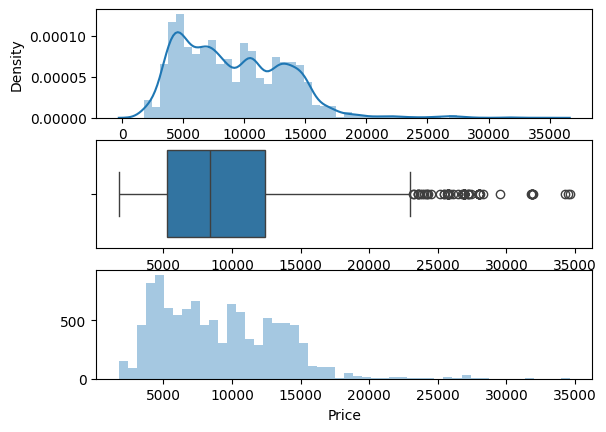

In [122]:
plots(data,'Price')

In [129]:
## feature selection
from sklearn.feature_selection import mutual_info_regression
Xfeat=data.drop('Price',axis=1)
yfeat=data['Price']
imp=mutual_info_regression(Xfeat,yfeat)

In [130]:
imp

array([1.31384826, 1.05871712, 0.78496464, 0.61604747, 0.36356307,
       0.91379041, 0.75050288, 1.13766485, 0.9039338 , 1.1189245 ,
       0.68261036, 0.39427765, 0.45092986, 0.51660684, 0.13172412,
       0.19500198])

In [131]:
imp_df=pd.DataFrame(imp,index=Xfeat.columns)

In [133]:
imp_df.columns=['Importance']

In [137]:
imp_df.sort_values(by='Importance',ascending=False)

,Importance
Airline,1.313848
Arrival_Time_hour,1.137665
Duration_mins,1.118924
Destination,1.058717
Dep_Time_hour,0.913790
Arrival_Time_min,0.903934
Total_Stops,0.784965
Dep_Time_min,0.750503
Duration_hours,0.682610
Month_of_Journey,0.616047


In [140]:
cor=data.corr()

<Axes: >

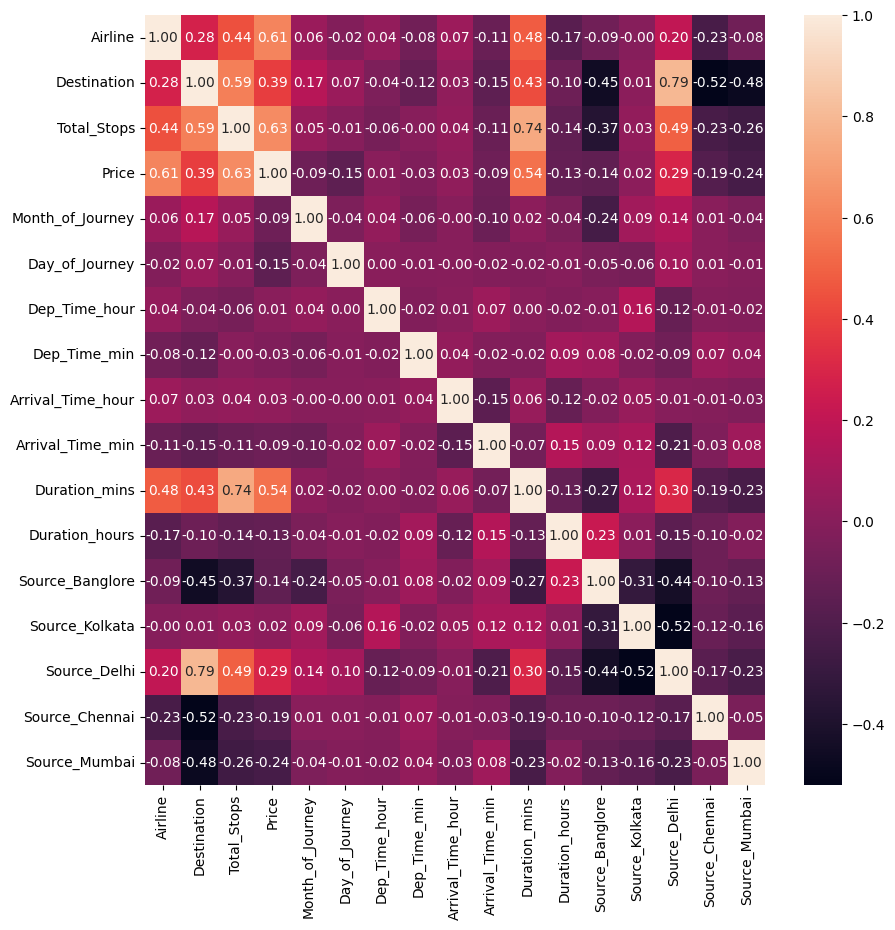

In [148]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True,fmt='.2f')

In [149]:
# Ml building

In [150]:
from sklearn.ensemble import RandomForestRegressor

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xfeat, yfeat, test_size=0.25, random_state=42)

In [153]:
ml_model=RandomForestRegressor()

In [154]:
ml_model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [155]:
from sklearn.metrics  import r2_score

In [156]:
ypred=ml_model.predict(X_test)

In [157]:
r2_score(y_true=y_test,y_pred=ypred)

0.8105998703203778

In [158]:
#save model  
import pickle

In [159]:
file =open('randomforestmodel.pkl',mode='wb')

In [161]:
pickle.dump(obj=ml_model,file=file)

In [162]:
# load 
my_Model=open('randomforestmodel.pkl','rb')

In [163]:
moodle=pickle.load(my_Model)

In [164]:
y_pred=moodle.predict(X_test)

In [165]:
r2_score(y_pred=y_pred,y_true=y_test)

0.8105998703203778

In [170]:
## MAPE mean absolute percentage error
type(y_test)

pandas.core.series.Series

In [169]:
type(np.array(y_test))

numpy.ndarray

In [172]:
len(np.array(y_test))

2671

In [178]:
def MAPE(y_true,y_pred):
    return       sum(abs( np.array(y_true)-np.array(y_pred) )/np.array(y_true))/len(np.array(y_true))*100

In [179]:
MAPE(y_test,y_pred)

np.float64(13.192110968256616)

In [ ]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [180]:
np.array(y_test)[0]

np.float64(16655.0)

In [181]:
np.array(y_pred)[0]

np.float64(16878.43)

In [190]:
abs(np.array(y_pred)[333]-np.array(y_test)[333])/np.array(y_test)[333] *100

np.float64(13.733462123873071)

In [214]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    from sklearn import metrics
    print(f'Training Score: {model.score(X_train,y_train)}') 
    y_predection=model.predict(X_test)
    print(f'Predictions: {y_predection}')    
    print(f'\n')    
    print(f'-'*100)    
    print(f'MAE: {metrics.r2_score(y_test , y_predection)}')    
    print(f'MAE: {metrics.mean_absolute_error(y_test , y_predection)}')    
    print(f'MSE: {metrics.mean_squared_error(y_test , y_predection)}')    
    print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test , y_predection))}')    
    print(f'MAPE: {MAPE(y_test , y_predection)}') 
    sns.distplot(y_predection-y_test)
  

Training Score: 0.9512556294124964
Predictions: [16827.33  5350.37  8757.34 ...  3541.04  6441.44  6839.48]


----------------------------------------------------------------------------------------------------
MAE: 0.8135490816645924
MAE: 1169.3022238496144
MSE: 3629751.8354055234
RMSE: 1905.1907608965364
MAPE: 13.12814321267132


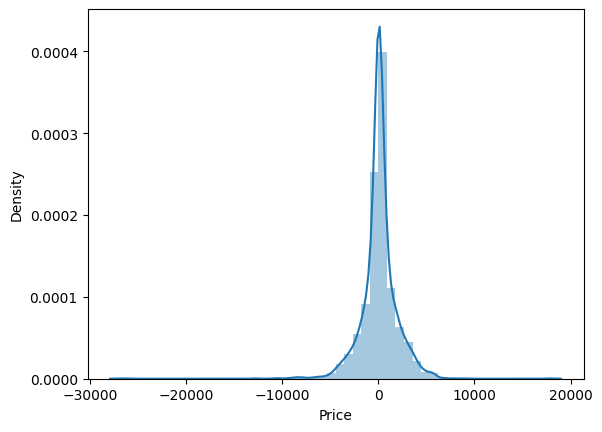

In [215]:
predict(ml_model)

Training Score: 0.966591628243878
Predictions: [16840.  4959.  8610. ...  3419.  5797.  6442.]


----------------------------------------------------------------------------------------------------
MAE: 0.6795781360961755
MAE: 1402.3624734805942
MSE: 6237844.570530596
RMSE: 2497.5677309195435
MAPE: 15.528822641410608


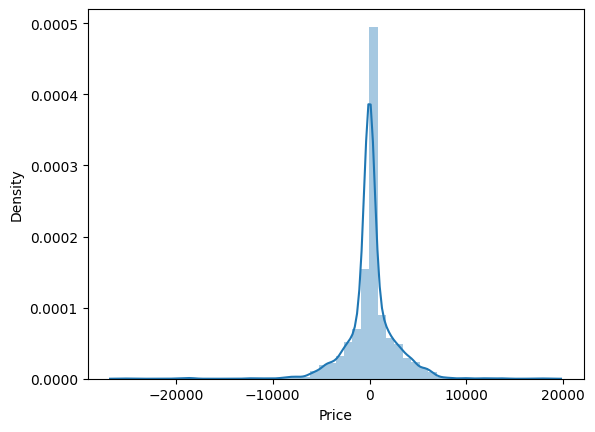

In [216]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor())

In [217]:
from xgboost import XGBRegressor

Training Score: 0.9282644742578454
Predictions: [16627.258  6014.878  7973.472 ...  3526.002  7921.331  6444.837]


----------------------------------------------------------------------------------------------------
MAE: 0.8332654707576961
MAE: 1147.8820062692314
MSE: 3245921.0656931265
RMSE: 1801.6439897197022
MAPE: 13.037761422743266


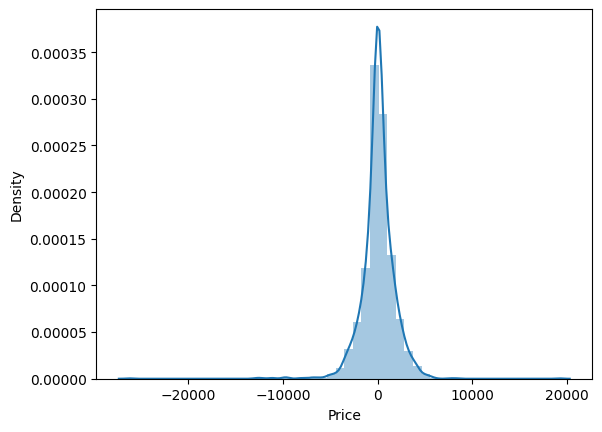

In [218]:
predict(XGBRegressor())

In [220]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]

random_grid = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split
}

In [221]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [222]:
from sklearn.model_selection import RandomizedSearchCV

In [223]:
rf=RandomForestRegressor()

In [224]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [225]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,estimator,RandomForestRegressor()
,param_distributions,"{'max_depth': [5, 13, ...], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [5, 10, ...], 'n_estimators': [100, 320, ...]}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [226]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 13}

In [228]:
rf_random.best_score_

np.float64(0.804425896766829)

Training Score: 0.8926457539083014
Predictions: [16118.58472785  5713.56857354  8671.80707042 ...  3872.7250518
  8167.51325121  6865.43646967]


----------------------------------------------------------------------------------------------------
MAE: 0.8189974786067395
MAE: 1246.9193177107743
MSE: 3523684.6249174485
RMSE: 1877.148002933559
MAPE: 14.122921367486772


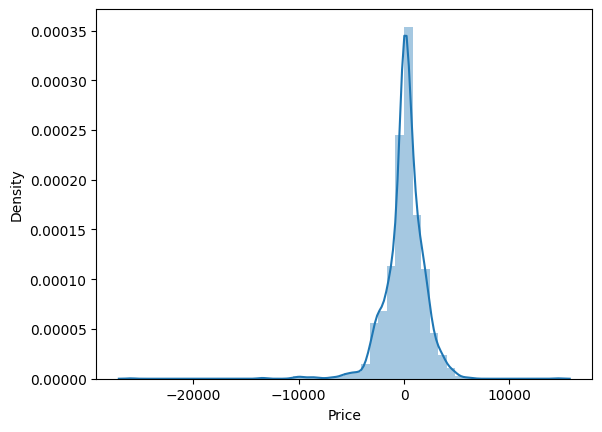

In [229]:
predict(RandomForestRegressor(n_estimators=1200,min_samples_split=5,max_features='sqrt',max_depth=13))

END